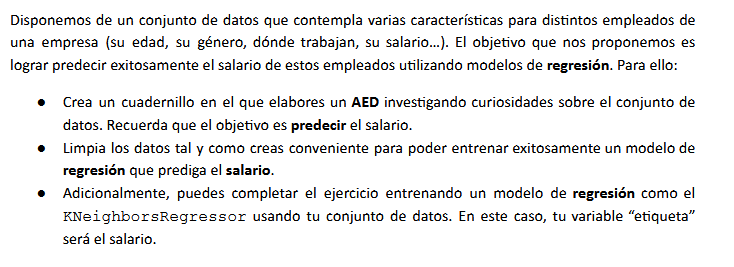

#AED inicial

##Dataset empleados empresa
El dataset elegido es un dataset en formato csv con información de los empleados de una empresa.

En un primer vistazo vemos que contiene los siguientes campos:
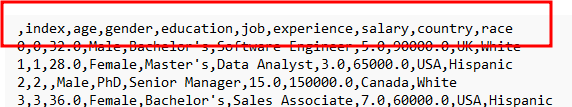

Descripción de los campos:


*   index: indice que represanta la ordinalidad de las filas
*   age: edad del empleado.   
*   gender: género del empleado.
*   education: nivel de estudios del empleado.
*   job: trabajo desempeñado en la empresa.
*   experience: años de experiencia.
*   salary: salario que percibe.
*   country: procedencia del empleado.
*   race: raza del empleado.




## Subimos dataset al entorno colab
El dataset lo subo a la carpeta local datasets y de ahí lo cargo en un dataframe de pandas.




In [337]:
# Importación de librerías
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.decomposition import PCA # PCA = Principal Component Analysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.manifold import TSNE

Preparación de estructura de carpetas y subida de dataset a colab.

Las siguientes celdas que preparan el entorno las comento una vez cargado para que no se realice en posteriores ejecuciones.

In [211]:
!ls -la

total 24
drwxr-xr-x 1 root root 4096 Dec  4 15:11 .
drwxr-xr-x 1 root root 4096 Dec  4 15:10 ..
drwxr-xr-x 4 root root 4096 Dec  2 14:21 .config
drwxr-xr-x 2 root root 4096 Dec  4 15:13 datasets
drwxr-xr-x 2 root root 4096 Dec  4 15:11 .ipynb_checkpoints
drwxr-xr-x 1 root root 4096 Dec  2 14:21 sample_data


In [212]:
!pwd

/content


In [213]:
!mkdir /content/datasets

mkdir: cannot create directory ‘/content/datasets’: File exists


In [214]:
!ls -la /content/datasets

total 532
drwxr-xr-x 2 root root   4096 Dec  4 15:13 .
drwxr-xr-x 1 root root   4096 Dec  4 15:11 ..
-rw-r--r-- 1 root root 533333 Dec  4 15:13 dataset.csv


## Carga del dataset

In [215]:
df = pd.read_csv('/content/datasets/dataset.csv')

##Visualización del dataset
Visualizamos las primeras 5 observaciones y las 5 últimas.

In [216]:
print("Primeras 5 observaciones")
print(df.head())
print("=====================================================================================")
print("Ultimas 5 observaciones")
print(df.tail())

Primeras 5 observaciones
   Unnamed: 0  index   age  gender   education                job  experience  \
0           0      0  32.0    Male  Bachelor's  Software Engineer         5.0   
1           1      1  28.0  Female    Master's       Data Analyst         3.0   
2           2      2   NaN    Male         PhD     Senior Manager        15.0   
3           3      3  36.0  Female  Bachelor's    Sales Associate         7.0   
4           4      4  52.0    Male    Master's           Director        20.0   

     salary country      race  
0   90000.0      UK     White  
1   65000.0     USA  Hispanic  
2  150000.0  Canada     White  
3   60000.0     USA  Hispanic  
4  200000.0     USA     Asian  
Ultimas 5 observaciones
      Unnamed: 0  index   age  gender          education  \
6699        6699   6699  49.0  Female                PhD   
6700        6700   6700  32.0    Male        High School   
6701        6701   6701  30.0  Female  Bachelor's Degree   
6702        6702   6702  46.0   

## Características de las observaciones

In [217]:
# Obtenemos los nombres de las columnas del dataset.
df.columns.to_list()

['Unnamed: 0',
 'index',
 'age',
 'gender',
 'education',
 'job',
 'experience',
 'salary',
 'country',
 'race']

Podemos observar que existe una columna sin nombre de cabecera que tiene el mismo valor que la columna index.

Dicha columna la anotamos para eliminar posteriormente.

In [218]:
# Obtenemos el tipo de dato de cada columna y el número de filas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6704 non-null   int64  
 1   index       6704 non-null   int64  
 2   age         6142 non-null   float64
 3   gender      6702 non-null   object 
 4   education   6701 non-null   object 
 5   job         6702 non-null   object 
 6   experience  6701 non-null   float64
 7   salary      6699 non-null   float64
 8   country     6704 non-null   object 
 9   race        6704 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 523.9+ KB


Observamos que existen 6704 filas y que hay alguna fila con valores nulos.



In [219]:
# Obtenemos las columnas por tipo de dato (numérico u objeto), observando la salida de df.info()
string_columns = df.select_dtypes(include=['object']).columns.tolist()
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Columnas de tipo string:", string_columns)
print("Columnas de tipo numérico:", numeric_columns)

Columnas de tipo string: ['gender', 'education', 'job', 'country', 'race']
Columnas de tipo numérico: ['Unnamed: 0', 'index', 'age', 'experience', 'salary']


Observamos que existen columnas numéricas como Unnamed (a eliminar), index, age, experience y salary.

El resto de columnas son de tipo Object que posiblemente puedan categorizarse.

## Observación de las columnas no numéricas

In [220]:
# Observamos la diversidad de valores en cada columna no numérica
print(df.gender.unique())
print(df.education.unique())
print(df.job.unique())
print(df.country.unique())
print(df.race.unique())

['Male' 'Female' nan 'Other']
["Bachelor's" "Master's" 'PhD' nan "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
['Software Engineer' 'Data Analyst' 'Senior Manager' 'Sales Associate'
 'Director' 'Marketing Analyst' 'Product Manager' 'Sales Manager'
 'Marketing Coordinator' 'Senior Scientist' 'Software Developer'
 'HR Manager' 'Financial Analyst' 'Project Manager' 'Customer Service Rep'
 'Operations Manager' 'Marketing Manager' 'Senior Engineer'
 'Data Entry Clerk' 'Sales Director' 'Business Analyst' 'VP of Operations'
 'IT Support' 'Recruiter' 'Financial Manager' 'Social Media Specialist'
 'Software Manager' 'Junior Developer' 'Senior Consultant'
 'Product Designer' 'CEO' 'Accountant' 'Data Scientist'
 'Marketing Specialist' 'Technical Writer' 'HR Generalist'
 'Project Engineer' 'Customer Success Rep' 'Sales Executive' 'UX Designer'
 'Operations Director' 'Network Engineer' 'Administrative Assistant'
 'Strategy Consultant' 'Copywriter' 'Account Manager'
 'Director of Marke

In [221]:
# Observamos la diversidad de valores en cada columna no numérica
print(f'{df.gender.name}: {len(df.gender.unique().tolist())}')
print(f'{df.education.name}: {len(df.education.unique().tolist())}')
print(f'{df.job.name}: {len(df.job.unique().tolist())}')
print(f'{df.country.name}: {len(df.country.unique().tolist())}')


gender: 4
education: 8
job: 194
country: 5


Vemos que el campo Job tiene demasiados valores únicos para categorzar la columna. (Aunque posteriormente la categorizo)

Lo siguiente que voy a hacer es unificar valores del campo educación que me parece que son lo mismo (esto lo estoy haciendo porque me acabo de dar cuenta en el paso de aplicar Binary encoding a dicha variable). Lo aplico aqui (espero que no se me j... todo 😇)

In [222]:
# Bachelor's Degree = Bachelor's
# Master's Degree
# PhD = phD

df['education'] = df['education'].replace('Bachelor\'s Degree', 'Bachelor\'s')
df['education'] = df['education'].replace('Master\'s Degree', 'Master\'s')
df['education'] = df['education'].replace('PhD', 'phD')

df.education.unique()

array(["Bachelor's", "Master's", 'phD', nan, 'High School'], dtype=object)

## Observación de las columnas numéricas

In [223]:
# Describimos las columnas numéricas.
#df.describe(exclude=df.columns[0:2].tolist())
df.describe()




,Unnamed: 0,index,age,experience,salary
count,6704.000000,6704.000000,6142.000000,6701.000000,6699.000000
mean,3351.500000,3351.500000,33.616412,8.094687,115326.964771
std,1935.422435,1935.422435,7.689423,6.059003,52786.183911
min,0.000000,0.000000,-1.000000,0.000000,350.000000
25%,1675.750000,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,6703.000000,62.000000,34.000000,250000.000000


## Analizamos la distribución de los datos numéricos.

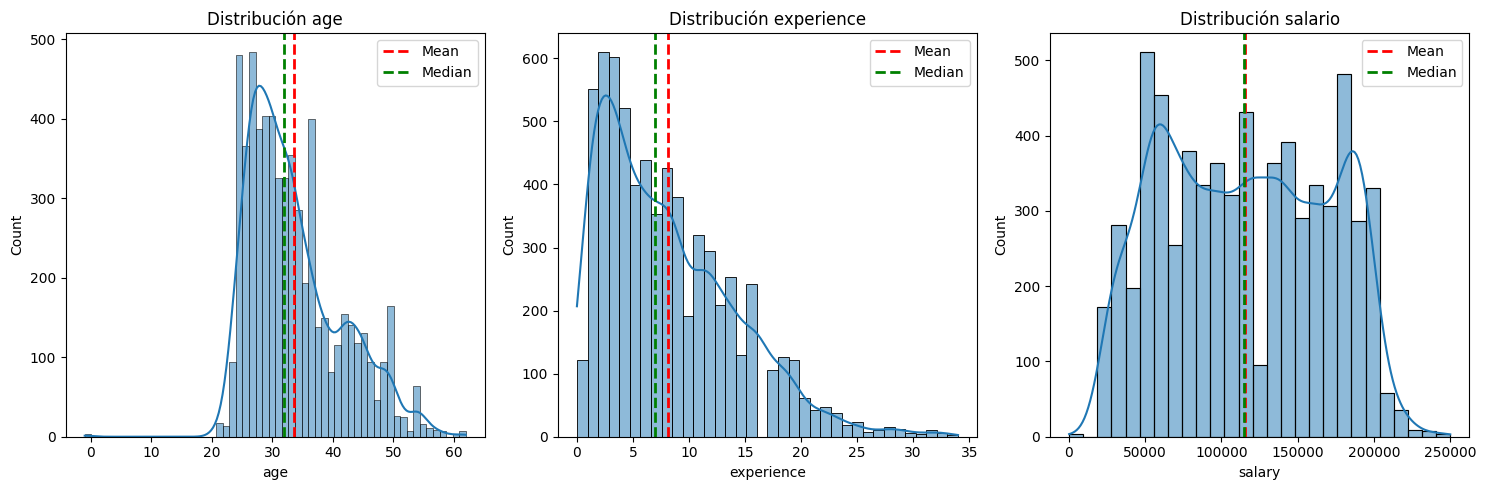

In [224]:
# Para poder representar las tres distribuciones de las columnas numéricas en la misma vista
# creamos una figura de 1 fila y 3 columnas.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Distribución de la edad (plot 1)
sns.histplot(df.age, kde=True, ax=axes[0])
axes[0].axvline(df.age.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axes[0].axvline(df.age.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
axes[0].set_title('Distribución age')
axes[0].legend()


# Distribución de los años de experiencia (plot 2)
sns.histplot(df.experience, kde=True, ax=axes[1])
axes[1].axvline(df.experience.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axes[1].axvline(df.experience.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
axes[1].set_title('Distribución experience')
axes[1].legend()


# Distribución del salario
sns.histplot(df.salary, kde=True, ax=axes[2])
axes[2].axvline(df.salary.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
axes[2].axvline(df.salary.median(), color='green', linestyle='dashed', linewidth=2, label='Median')
axes[2].set_title('Distribución salario')
axes[2].legend()


# Ajustamos el grafico
plt.tight_layout()
plt.show()

Podemos observar que el campo **age** tiene forma de campana de Gauss (Distribución Normal) escorada a la izquierda con más empleado jóvenes, extendiendose la cola de la derecha indicando que de los 35 a los 60 hay más variabilidad de empleados, concentrandose la mayoría de empleados entre los 25 y los 30.

En cuanto a **experience** observamos que la campana está también escorada a la izquierda. Viendose que la experiencia de los empleados está concentrada entre empleados con 2 a 5 años de experiencia.  Depués la cola de la derecha se extiende hasta los 35 años. Existe mucha más variabilidad entre los empleados entre 6 y 35 años de experiencia.

Finalmente **el salario** vemos una campana con dos crestas, lo cual parece indicarnos que existen como dos tipos de distribución de salarios. Una entre cero y 100000 y otra entre 100000 y 250000

## Detección de valores atípicos
En la salida obtenida anteriormente df.describe() lo que se vé en cuanto a valores sin sentido vemos en el campo edad el mínimo en -1. Esto hay que solucionarlo.

Intentamos visualizarlo...

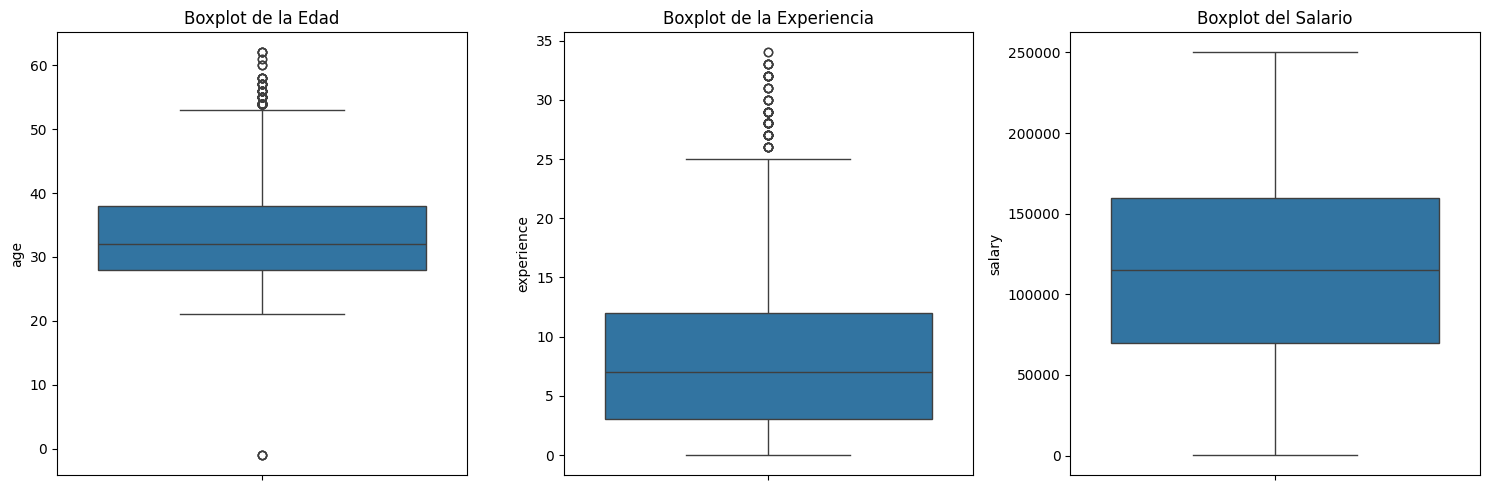

In [225]:
# Creamos tres subplots in la misma figura
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# El array axes representa un array donde ubicar en cada columna un boxplot

# Boxplot para edad
sns.boxplot(y=df['age'], ax=axes[0])
axes[0].set_title('Boxplot de la Edad')

# Boxplot para años de experiencia
sns.boxplot(y=df['experience'], ax=axes[1])
axes[1].set_title('Boxplot de la Experiencia')

# Boxplot para salario
sns.boxplot(y=df['salary'], ax=axes[2])
axes[2].set_title('Boxplot del Salario')

plt.tight_layout()
plt.show()

En el boxplot de la edad podemos ver que aunque muestra puntos por encima del Minimo 1.5 veces el IRQ, son bastantes y no tienen porque eliminarse porque es perfectamente válidas esas edades para poder estar empleado, de echo el máximo valor en la edad del dataset es 62, siendo este perfectamente válido (y más que lo va a ser en el futuro) 🥵
Por debajo si que debemos eliminar el punto que nos muestra una edad de -1.

Respecto al Boxplot **experiencia** vemos varios valores por encima del máximo (1.5 IRQ), pero merece la misma explicación y de echo están relacionados, que la edad, a más edad más experiencia (si hablamos de experiencia general, y no de un cargo específico). Por lo tanto no los quitamos.

Finalmente respecto al Boxplot **salario** no se ve ningún valor atípico (extraño por el contrario). Se ve muy centrado. Se observa que el 50% (entre percentiles 1 y 3) los empleados cobran entre 7000 y 15000 y luego se ven salarios bastantes más altos y bajos.

## Estudio de correlación

Vamos a estudiar si existen columnas correladas.

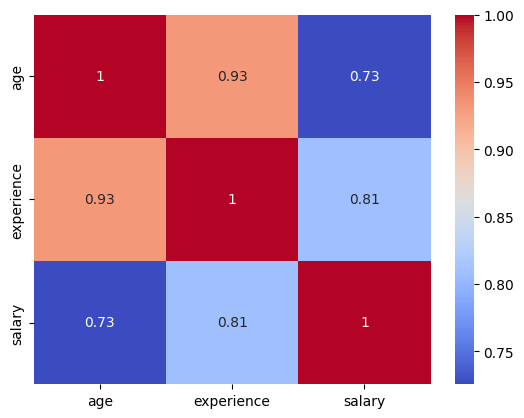

In [226]:
# Seleccionamos las columnas numéricas para estudiar su correlación
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
# Quitamos index y unnamed: 0 ya que las vamos a eliminar posteriormente
numeric_columns.remove('index')
numeric_columns.remove('Unnamed: 0')
numeric_df = df[numeric_columns]

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()



En este dataset podemos observar que tanto la experiencia, edad y salario están altamente correladas. Como el salario es lo que queremos predecir, podemos eliminar la edad ya que estamos observando que a mayor edad también se tiene mayor experiencia.

In [227]:
# Eliminamos la columna age
df = df.drop(columns=['age'])

#Limpieza de columnas inútiles, valores sin sentido y atípicos.

## Eliminación de columnas inútiles.

A la hora de quitar información es muy importante saber que es lo que queremos predecir para determinar si las columnas pueden o no ser significativas. En este caso queremos predecir el **salario**.

La columna que no tiene etiquela (Unnamed) hay que eliminarla porque además se corresponde con el índice.
La columna índice tampoco nos aporta gran valor, por lo que la podemos eliminar.

El resto de columnas veo que pueden influir a la hora de predecir el salario de un empleado.

In [228]:
# Obtenemos las columnas
df.columns.to_list()
df = df.drop(columns=['Unnamed: 0', 'index'])
df.columns.to_list()

['gender', 'education', 'job', 'experience', 'salary', 'country', 'race']

In [229]:
# Visualizamos primeras filas
df.head()

,gender,education,job,experience,salary,country,race
0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,Male,phD,Senior Manager,15.0,150000.0,Canada,White
3,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,Male,Master's,Director,20.0,200000.0,USA,Asian


#Eliminamos valores atípicos en la edad.

NOTA: He realizado esta parte antes que el estudio de correlación, por lo que al haber eliminado la columna edad en el estudio de correlación ahora no tiene sentido este tratamiento ya que la columna age ya no existe.

Lo dejo (no lo borro) por si en un futuro se ve que es mejor dejar el campo age en el dataframe.



> Comento todo el código que hace referencia al tratamiento de la columna age.



In [230]:
# df.age.describe()

In [231]:
# print(sorted(df.age.unique()))

In [232]:
# Vemos cuantos registros tenemos con edad igual a -1
# Como no son muchos y considero que la edad puede determinar (además de la experiencia) el salario los elimino
# print(df[df.age == -1])
# print(f'Registros con edad = -1: {len(df.age[df.age == -1])}')

In [233]:
# Eliminacion registros edad -1
# df = df[df.age != -1]
# df.age.describe()

Ahora ya vemos que la edad mínima es 21. Por lo tanto no tengo que eliminar registros con edad inferior a 18 años (edad legal para poder trabajar).

Si no tendría que hacer lo mismo `df = df[df.age >= 18]`

Vemos que hay un valor NaN (más adelante veremos que hacemos con el).

#Tratamiento de valores nulos.

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      6702 non-null   object 
 1   education   6701 non-null   object 
 2   job         6702 non-null   object 
 3   experience  6701 non-null   float64
 4   salary      6699 non-null   float64
 5   country     6704 non-null   object 
 6   race        6704 non-null   object 
dtypes: float64(2), object(5)
memory usage: 366.8+ KB


Solo con ver la poca cantidad de valores nulos que hay en todos los campos se pueden eliminar sin dudarlo.

Podemos ver como el total es 15 valores nulos.

In [235]:
# Numero de valores nulos en total
df.isnull().sum().sum()

15

In [236]:
# Elimninamos nulos de gender
df = df.dropna(subset=['gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6702 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      6702 non-null   object 
 1   education   6701 non-null   object 
 2   job         6702 non-null   object 
 3   experience  6701 non-null   float64
 4   salary      6699 non-null   float64
 5   country     6702 non-null   object 
 6   race        6702 non-null   object 
dtypes: float64(2), object(5)
memory usage: 418.9+ KB


In [237]:
# Eliminamos nulos de educacion
df = df.dropna(subset=['education'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6701 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      6701 non-null   object 
 1   education   6701 non-null   object 
 2   job         6701 non-null   object 
 3   experience  6700 non-null   float64
 4   salary      6698 non-null   float64
 5   country     6701 non-null   object 
 6   race        6701 non-null   object 
dtypes: float64(2), object(5)
memory usage: 418.8+ KB


In [238]:
# Eliminamos nulos de job
df = df.dropna(subset=['job'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6701 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      6701 non-null   object 
 1   education   6701 non-null   object 
 2   job         6701 non-null   object 
 3   experience  6700 non-null   float64
 4   salary      6698 non-null   float64
 5   country     6701 non-null   object 
 6   race        6701 non-null   object 
dtypes: float64(2), object(5)
memory usage: 418.8+ KB


In [239]:
# Eliminamos nulos de experiencia
df = df.dropna(subset=['experience'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6700 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      6700 non-null   object 
 1   education   6700 non-null   object 
 2   job         6700 non-null   object 
 3   experience  6700 non-null   float64
 4   salary      6698 non-null   float64
 5   country     6700 non-null   object 
 6   race        6700 non-null   object 
dtypes: float64(2), object(5)
memory usage: 418.8+ KB


In [240]:
# Eliminamos nulos de salary
df = df.dropna(subset=['salary'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      6698 non-null   object 
 1   education   6698 non-null   object 
 2   job         6698 non-null   object 
 3   experience  6698 non-null   float64
 4   salary      6698 non-null   float64
 5   country     6698 non-null   object 
 6   race        6698 non-null   object 
dtypes: float64(2), object(5)
memory usage: 418.6+ KB


En este caso podría haber utilizado directamente

```
df = df.dropna()
```
La justificación es porque al existir tan pocos valores nulos aunque no se solapen los valores nulos de diferentes campos en la misma fila, eliminamos pocos registros. Menos de un 10% que pordría ser problemático.


In [241]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      6698 non-null   object 
 1   education   6698 non-null   object 
 2   job         6698 non-null   object 
 3   experience  6698 non-null   float64
 4   salary      6698 non-null   float64
 5   country     6698 non-null   object 
 6   race        6698 non-null   object 
dtypes: float64(2), object(5)
memory usage: 418.6+ KB


#Análisis de variabilidad

## Variabilidad de las columnas categóricas

In [242]:
# Obtenemos las columnas categóricas
df.select_dtypes(include=['object']).columns.tolist()


['gender', 'education', 'job', 'country', 'race']

In [243]:
# Analizamos variabilidad de gender
print(df.gender.value_counts())
print(f'Total: {df.gender.value_counts().sum()}')

gender
Male      3671
Female    3013
Other       14
Name: count, dtype: int64
Total: 6698


In [244]:
(3671 - (3013 + 14) )* 100 / 6698


9.61481039116154

Vemos que la variabilidad del campo genero es de 9.6% menor al 20% por lo tanto está bien.

Para calcular la variabilidad de la columna vemos la proporción del valor más representando respecto al resto de campos.

In [245]:
# Analizamos la variabilidad de educacion
print(df.education.value_counts())
print(f'Total: {df.education.value_counts().sum()}')

education
Bachelor's     3021
Master's       1860
phD            1369
High School     448
Name: count, dtype: int64
Total: 6698


In [246]:
3021 - (6698 - 3021)

-656

Restando el valor más representado menos el resto de valors distintos a dicho valor, nos dá un número negativo, que es una situación ideal para representar la variabilidad de una columna.

In [247]:
# Analizamos la variabilidad de job
print(df.job.value_counts())
print(f'Total: {df.job.value_counts().sum()}')

job
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: count, Length: 191, dtype: int64
Total: 6698


In [248]:
518 - (6698 - 518)

-5662

En la variable jobs, el análisis del valor más representado en relacón con el resto de valores da negativo, representando una situación idónea para una variable categórica, respecto al estudio de variabilidad.
También veo que hay muchos valores, dentro de los 191 posibles distintos valores, que solo tienen un valor que no tienen ningún sentido para que sea una variable categórica.

In [249]:
#Analizamos la variabilidad de country
print(df.country.value_counts())
print(f'Total: {df.country.value_counts().sum()}')

country
USA          1359
China        1343
Australia    1336
UK           1335
Canada       1325
Name: count, dtype: int64
Total: 6698


Mismo razonamiento vemos que el valor más representado respecto al resto va a dar negativo.

In [250]:
# Analizamos la variabilidad de race
print(df.race.value_counts())
print(f'Total: {df.race.value_counts().sum()}')

race
White               1962
Asian               1603
Korean               457
Australian           452
Chinese              444
Black                437
African American     354
Mixed                334
Welsh                333
Hispanic             322
Name: count, dtype: int64
Total: 6698


Mismo razonamiento para la variable **race** vemos que el valor más representado respecto al resto va a dar negativo

La **experiencia** aunque es un valor numérico se puede tratar como categórica, ya que

In [251]:
# Analizamos la variabilidad de experience
print(df.experience.value_counts())
print(f'Total valores distintos: {len(df.experience.value_counts())}')
print(f'Total: {df.experience.value_counts().sum()}')

experience
2.0     610
3.0     602
1.0     540
4.0     522
6.0     438
8.0     425
5.0     399
9.0     380
7.0     352
11.0    320
12.0    294
14.0    253
16.0    242
13.0    209
10.0    192
15.0    129
18.0    126
19.0    121
0.0     120
17.0    106
20.0     61
22.0     47
21.0     42
23.0     37
25.0     24
24.0     19
28.0     16
1.5      12
29.0     12
27.0     11
32.0     10
26.0      7
30.0      6
33.0      6
31.0      5
34.0      2
0.5       1
Name: count, dtype: int64
Total valores distintos: 37
Total: 6698


In [252]:
37 / 6698 # --> Esto nos justifica el que podamos tratarla como categórica

0.005524037025977904

In [253]:
# Dividimos el valor más representado entre el resto de valores
610 - (6698 - 610)

-5478

Otra vez la proporción del valor más representado respecto al resto de valores nos da un valor negativo indicandonos que la variabilidad de la variable es correcta.

Vemos que las variables categóricas tienen una variabilidad correcta y no tenemos que eliminar ninguna de ellas por dicho motivo.

## Variabilidad de las columnas numéricas

In [254]:
# Obtenemos las columnas numéricas
df.select_dtypes(include=['float64']).columns.tolist()
#df.dtypes
#df.columns.is_numeric

['experience', 'salary']

**experience** ya ha sido tratada como variable categórica y **salary** es la variable que queremos predecir.

#Columnas categóricas

Tenemoso que analizar cada variable categórica si el orden es importante o no y en caso de que no deban tener orden hay que romperlo utilizando alguna de las siguientes técnicas, one hot encoding (no muy recomendable por las dimensiones que añade al dataset) o binary encoding (técnica que utilizaremos en las variables que necesitemos romper el orden), el inconveniente de esta técnica es la pérdida de interpretabilidad.

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 6703
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gender      6698 non-null   object 
 1   education   6698 non-null   object 
 2   job         6698 non-null   object 
 3   experience  6698 non-null   float64
 4   salary      6698 non-null   float64
 5   country     6698 non-null   object 
 6   race        6698 non-null   object 
dtypes: float64(2), object(5)
memory usage: 418.6+ KB


Utilizaremo el siguiente código para realizar un Binary encoding. (código facilitado en el curso)

In [256]:
def binary_categorizer(dataframe, column, code_map: dict = None, cols: int = None):
  # resultados
  result = []

  # puede ser que me obliguen a que haya un número determinado de columnas
  if not cols:
    cols = math.ceil(math.log2(len(dataframe[column].unique()))) # aplico la fórmula de log_2_n y lo aproximo al número más grande

  # puede ser que no se conozca el mapa y tenga que inferirlo
  if not code_map:
    code_map = {value: key for key, value in enumerate(dataframe[column].unique())} # creo el mapa de forma genérica si no existe

  # realizo la codificación a binario, comprobando que puedo hacerlo para todos los valores
  for value in dataframe[column]:
    code = code_map[value] # recojo el código asignado
    b_code = format(code, "b") # lo convierto a binario

    if len(b_code) > cols: # cols no puede ser más pequeño que el código
      raise Exception(f"El número de columnas ({cols}) es demasiado pequeño para empaquetar la información ({len(b_code)}). Modifica el valor del atributo cols.")

    # realizo la codificación
    b_code_a = b_code.rjust(cols, "0") # lo formateo hasta tamaño cols rellenando con 0
    _value = list(b_code_a) # lo convierto a lista: cada elemento en una posición diferente 00 -> ["0", "0"]
    result.append(list(map(lambda v: int(v), _value))) # convierto la lista en una lista de enteros ["0", "0"] -> [0, 0]

  # defino las nuevas columnas y las añado a mi df
  new_columns_name = [f"{column}_{i}" for i in range(len(list(result[0])))] # les daré nombre a las nuevas columnas
  result_df = pd.DataFrame(result, index=dataframe.index, columns=new_columns_name) # creo un nuevo df con los resultados
  dataframe = pd.concat([dataframe, result_df], axis=1) # lo añado en el eje X respetando el orden
  return dataframe.drop(columns=[column]), code_map # también devuelvo el mapa de códigos, me será útil

Como hemos visto, todas las variables son categóricas (o al menos así las hemos tratado) excepto el salario que es la que queremos predecir.


## Tratamiento de la columna categórica **gender**

**gender** columna categórica en la que hay que romper el orden.
En este caso sería bastante parecido el aplicar One hot encoding (que añadiría tres nuevas columas para representar los tres diferentes estados de genre que el dataframe nos muestra, famale, male, others) o Binary encoding (que para representar tres valores necesitamos dos nuevas columnas binarias)

Codificación (Binary encoding) de los valores genre.


```
Male - 0 - 00
Female - 1 - 01
Other - 2 - 10
```




In [257]:
# Aplicamos binary encoding a la variable gender
_df = df.copy()
_df, gender_map = binary_categorizer(_df, 'gender')
# Visualizo que gender a desaparecido y transformado en gender_0 y gender_1
print(_df.head())
# Visualizo la codificación de gender
print(gender_map)
# Visualizo las columnas del dataset resultado
print(_df.columns.to_list())
# Realizo una pequeña comprobación donde intento ver que el gender "Other" efectivamente está codificado como "10"
print(_df[_df.gender_0 == 1].head())
print(df[df.gender == 'Other'].head())


    education                job  experience    salary country      race  \
0  Bachelor's  Software Engineer         5.0   90000.0      UK     White   
1    Master's       Data Analyst         3.0   65000.0     USA  Hispanic   
2         phD     Senior Manager        15.0  150000.0  Canada     White   
3  Bachelor's    Sales Associate         7.0   60000.0     USA  Hispanic   
4    Master's           Director        20.0  200000.0     USA     Asian   

   gender_0  gender_1  
0         0         0  
1         0         1  
2         0         0  
3         0         1  
4         0         0  
{'Male': 0, 'Female': 1, 'Other': 2}
['education', 'job', 'experience', 'salary', 'country', 'race', 'gender_0', 'gender_1']
        education                      job  experience    salary    country  \
2378  High School  Senior Project Engineer        31.0  166109.0     Canada   
2385  High School      Full Stack Engineer         2.0   69032.0         UK   
2406     Master's      Full Stack Eng

In [258]:
# Una vez validada la transformación a modo de ejercicio, copio _df en df.
df = _df.copy()
df.head()

,education,job,experience,salary,country,race,gender_0,gender_1
0,Bachelor's,Software Engineer,5.0,90000.0,UK,White,0,0
1,Master's,Data Analyst,3.0,65000.0,USA,Hispanic,0,1
2,phD,Senior Manager,15.0,150000.0,Canada,White,0,0
3,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic,0,1
4,Master's,Director,20.0,200000.0,USA,Asian,0,0


## Tratamiento de la columna categórica education

In [259]:
# Aplicamos binary encoding a la variable education
_df = df.copy()
_df, education_map = binary_categorizer(_df, 'education')
# Visualizo que gender a desaparecido y transformado en education_0  education_1
print(_df.head())
# Visualizo la codificación de education
print(education_map)
# Visualizo las columnas del dataset resultado
print(_df.columns.to_list())
# Realizo una pequeña comprobación
print(_df.iloc[2])
print(df.iloc[2])


                 job  experience    salary country      race  gender_0  \
0  Software Engineer         5.0   90000.0      UK     White         0   
1       Data Analyst         3.0   65000.0     USA  Hispanic         0   
2     Senior Manager        15.0  150000.0  Canada     White         0   
3    Sales Associate         7.0   60000.0     USA  Hispanic         0   
4           Director        20.0  200000.0     USA     Asian         0   

   gender_1  education_0  education_1  
0         0            0            0  
1         1            0            1  
2         0            1            0  
3         1            0            0  
4         0            0            1  
{"Bachelor's": 0, "Master's": 1, 'phD': 2, 'High School': 3}
['job', 'experience', 'salary', 'country', 'race', 'gender_0', 'gender_1', 'education_0', 'education_1']
job            Senior Manager
experience               15.0
salary               150000.0
country                Canada
race                    White

In [260]:
# Una vez validada la transformación a modo de ejercicio, copio _df en df.
df = _df.copy()
df.head()

,job,experience,salary,country,race,gender_0,gender_1,education_0,education_1
0,Software Engineer,5.0,90000.0,UK,White,0,0,0,0
1,Data Analyst,3.0,65000.0,USA,Hispanic,0,1,0,1
2,Senior Manager,15.0,150000.0,Canada,White,0,0,1,0
3,Sales Associate,7.0,60000.0,USA,Hispanic,0,1,0,0
4,Director,20.0,200000.0,USA,Asian,0,0,0,1


## Tratamiento de la columna categórica job

In [261]:
# Aplicamos binary encoding a la variable job
_df = df.copy()
_df, job_map = binary_categorizer(_df, 'job')
# Visualizo que gender a desaparecido y transformado en job_0  job_1  job_2  job_3  job_4  job_5  job_6  job_7
print(_df.head())
# Visualizo la codificación de job
print(job_map)
# Visualizo las columnas del dataset resultado
print(_df.columns.to_list())
# Realizo una pequeña comprobación
print(_df.iloc[2])
print(df.iloc[2])

   experience    salary country      race  gender_0  gender_1  education_0  \
0         5.0   90000.0      UK     White         0         0            0   
1         3.0   65000.0     USA  Hispanic         0         1            0   
2        15.0  150000.0  Canada     White         0         0            1   
3         7.0   60000.0     USA  Hispanic         0         1            0   
4        20.0  200000.0     USA     Asian         0         0            0   

   education_1  job_0  job_1  job_2  job_3  job_4  job_5  job_6  job_7  
0            0      0      0      0      0      0      0      0      0  
1            1      0      0      0      0      0      0      0      1  
2            0      0      0      0      0      0      0      1      0  
3            0      0      0      0      0      0      0      1      1  
4            1      0      0      0      0      0      1      0      0  
{'Software Engineer': 0, 'Data Analyst': 1, 'Senior Manager': 2, 'Sales Associate': 3, 'Direc

In [262]:
# Una vez validada la transformación a modo de ejercicio, copio _df en df.
df = _df.copy()
df.head()

,experience,salary,country,race,gender_0,gender_1,education_0,education_1,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7
0,5.0,90000.0,UK,White,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,65000.0,USA,Hispanic,0,1,0,1,0,0,0,0,0,0,0,1
2,15.0,150000.0,Canada,White,0,0,1,0,0,0,0,0,0,0,1,0
3,7.0,60000.0,USA,Hispanic,0,1,0,0,0,0,0,0,0,0,1,1
4,20.0,200000.0,USA,Asian,0,0,0,1,0,0,0,0,0,1,0,0


## Tratamiento de la columna categórica country

In [263]:
# Aplicamos binary encoding a la variable country
_df = df.copy()
_df, country_map = binary_categorizer(_df, 'country')
# Visualizo que gender a desaparecido y transformado en country_0  country_1  country_2
print(_df.head())
# Visualizo la codificación de country
print(country_map)
# Visualizo las columnas del dataset resultado
print(_df.columns.to_list())
# Realizo una pequeña comprobación
print(_df.iloc[2])
print(df.iloc[2])

   experience    salary      race  gender_0  gender_1  education_0  \
0         5.0   90000.0     White         0         0            0   
1         3.0   65000.0  Hispanic         0         1            0   
2        15.0  150000.0     White         0         0            1   
3         7.0   60000.0  Hispanic         0         1            0   
4        20.0  200000.0     Asian         0         0            0   

   education_1  job_0  job_1  job_2  job_3  job_4  job_5  job_6  job_7  \
0            0      0      0      0      0      0      0      0      0   
1            1      0      0      0      0      0      0      0      1   
2            0      0      0      0      0      0      0      1      0   
3            0      0      0      0      0      0      0      1      1   
4            1      0      0      0      0      0      1      0      0   

   country_0  country_1  country_2  
0          0          0          0  
1          0          0          1  
2          0          1

In [264]:
# Una vez validada la transformación a modo de ejercicio, copio _df en df.
df = _df.copy()
df.head()

,experience,salary,race,gender_0,gender_1,education_0,education_1,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,country_0,country_1,country_2
0,5.0,90000.0,White,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,65000.0,Hispanic,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,15.0,150000.0,White,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,7.0,60000.0,Hispanic,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1
4,20.0,200000.0,Asian,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


Tratamiento de la columna categórica race

In [265]:
# Aplicamos binary encoding a la variable race
_df = df.copy()
_df, race_map = binary_categorizer(_df, 'race')
# Visualizo que gender a desaparecido y transformado en
print(_df.head())
# Visualizo la codificación de country
print(race_map)
# Visualizo las columnas del dataset resultado
print(_df.columns.to_list())
# Realizo una pequeña comprobación
print(_df.iloc[2])
print(df.iloc[2])

   experience    salary  gender_0  gender_1  education_0  education_1  job_0  \
0         5.0   90000.0         0         0            0            0      0   
1         3.0   65000.0         0         1            0            1      0   
2        15.0  150000.0         0         0            1            0      0   
3         7.0   60000.0         0         1            0            0      0   
4        20.0  200000.0         0         0            0            1      0   

   job_1  job_2  job_3  ...  job_5  job_6  job_7  country_0  country_1  \
0      0      0      0  ...      0      0      0          0          0   
1      0      0      0  ...      0      0      1          0          0   
2      0      0      0  ...      0      1      0          0          1   
3      0      0      0  ...      0      1      1          0          0   
4      0      0      0  ...      1      0      0          0          0   

   country_2  race_0  race_1  race_2  race_3  
0          0       0       

In [266]:
# Una vez validada la transformación a modo de ejercicio, copio _df en df.
df = _df.copy()
df.head()

,experience,salary,gender_0,gender_1,education_0,education_1,job_0,job_1,job_2,job_3,...,job_5,job_6,job_7,country_0,country_1,country_2,race_0,race_1,race_2,race_3
0,5.0,90000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,65000.0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,15.0,150000.0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,7.0,60000.0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
4,20.0,200000.0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [267]:
df.head()

,experience,salary,gender_0,gender_1,education_0,education_1,job_0,job_1,job_2,job_3,...,job_5,job_6,job_7,country_0,country_1,country_2,race_0,race_1,race_2,race_3
0,5.0,90000.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,65000.0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,15.0,150000.0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,7.0,60000.0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
4,20.0,200000.0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


Hemos conseguido que todo el dataset esté representado por características numéricas.

¡¡¡ Nota importante !!! Me estoy dando cuenta que es posible que no he desechado columnas que quizas deba desechar, por el tema de las discriminaciones y esas cosas...voy quitar race y gender.

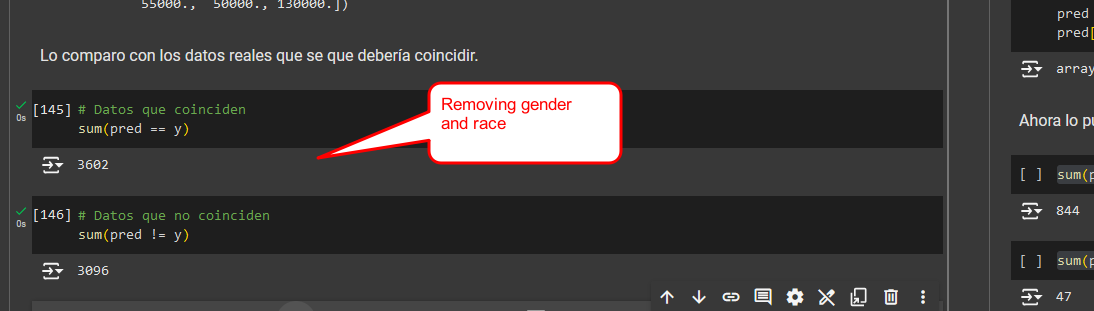


En la imagen que he pegado en esta celda (arriba), veo que el resultado de la predicción quitando gender y race son peores que con ellos, así que vuelvo a comentar las líneas que quitaban dichas columnas y la predicción va a ser también con las columnas gender y genre. (Espero Rubén que no te esté volviendo loco)

In [268]:
# Selecciono las columnas race
# cols_to_drop = df.filter(regex='^race').columns
# print(cols_to_drop)


In [269]:
# Elimino las columnas race_
# df = df.drop(columns=cols_to_drop)
# print(df.columns.to_list)

In [270]:
# Selecciono las columnas gender_
# cols_to_drop = df.filter(regex='^gender_').columns
# print(cols_to_drop)


In [271]:
# Elimino las columnas gender_
# df = df.drop(columns=cols_to_drop)
# print(df.columns.to_list)

#Reducción de la dimensionalidad y comparación de las dos técnicas vistas en el tema.

## Reducción interpretable (selección)

In [272]:
# Datos para entrenar y etiquetas
# X va a contener los datos a entrenar
# y va a contener la etiqueta a predecir
X, y = df.drop(columns = "salary"), df["salary"]

In [273]:
# Visualizamos los datos a entrenar.
X.head()

,experience,gender_0,gender_1,education_0,education_1,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,country_0,country_1,country_2,race_0,race_1,race_2,race_3
0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,15.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,7.0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
4,20.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [274]:
# visualizamos los valores ya conocidos de la etiqueta
y

,salary
0,90000.0
1,65000.0
2,150000.0
3,60000.0
4,200000.0
...,...
6699,200000.0
6700,50000.0
6701,55000.0
6702,140000.0


In [275]:
# Aplico el modelo
model = KNeighborsClassifier() # nuestro modelo
sfs = SequentialFeatureSelector(model) # se crea envolviendo al modelo

In [276]:
sub_X = sfs.fit_transform(X, y) # se usa como el resto
sub_X # mostramos el resultado

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

array([[ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3.,  1.,  1., ...,  0.,  0.,  1.],
       [15.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 4.,  1.,  0., ...,  0.,  0.,  0.],
       [14.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  1.,  1.,  0.]])

Visualizamos las columnas con las que se ha quedado el modelo.

In [277]:
columns_mask = sfs.get_support() # máscara booleana de las columnas utilizadas
X.columns[columns_mask] # estas son las variables más importantes para este modelo

Index(['experience', 'gender_1', 'education_1', 'job_0', 'job_2', 'job_3',
       'job_4', 'job_5', 'job_6', 'job_7'],
      dtype='object')

Predecimos resultados

In [278]:
model = KNeighborsClassifier()
model = model.fit(sub_X, y) # uso sub_train_X en vez de train_X porque hemos visto que es mejor este subconjunto
pred = model.predict(sub_X) # predigo el resultado final
pred[:10]

array([160000., 130000., 150000., 108267., 110000.,  50000., 196000.,
        55000.,  50000., 130000.])

Lo comparo con los datos reales que se que debería coincidir.

In [279]:
# Datos que coinciden
sum(pred == y)

4636

In [280]:
# Datos que no coinciden
sum(pred != y)

2062

In [281]:
# Prediccion bastante mala.
4636/(4636+2062)

0.6921469095252314

## Reducción no interpretable (extracción)

In [283]:
# Visualizamos una muestra de las columnas con la que partimos.
X.head()

,experience,gender_0,gender_1,education_0,education_1,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,country_0,country_1,country_2,race_0,race_1,race_2,race_3
0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,15.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,7.0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
4,20.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [284]:
ss = StandardScaler()
ss = ss.fit(X) # primero lo entreno, pero me guardo el escalador para el testeo
sub_X = ss.transform(X)
sub_X[:10]

array([[-0.51076899, -0.0457663 , -0.90423397, -0.61013096, -0.72507953,
        -0.72316318, -0.43651335, -1.01504296, -0.79078041, -0.68944209,
        -0.79777972, -0.88315502, -0.82026043, -0.49916006, -0.81365517,
        -0.82229932, -0.36066976, -0.55631099, -0.83382673, -0.65758716],
       [-0.84081078, -0.0457663 ,  1.10590846, -0.61013096,  1.37915906,
        -0.72316318, -0.43651335, -1.01504296, -0.79078041, -0.68944209,
        -0.79777972, -0.88315502,  1.219125  , -0.49916006, -0.81365517,
         1.21610218, -0.36066976, -0.55631099, -0.83382673,  1.52071096],
       [ 1.13943997, -0.0457663 , -0.90423397,  1.6389924 , -0.72507953,
        -0.72316318, -0.43651335, -1.01504296, -0.79078041, -0.68944209,
        -0.79777972,  1.13230404, -0.82026043, -0.49916006,  1.22902187,
        -0.82229932, -0.36066976, -0.55631099, -0.83382673, -0.65758716],
       [-0.1807272 , -0.0457663 ,  1.10590846, -0.61013096, -0.72507953,
        -0.72316318, -0.43651335, -1.01504296, -

Perdemos todo tipo de interpretabilidad.

Vamos a aplicar la técnica del análisis de componentes principales (PCA).
Esta técnica se queda con las características (columnas) que mejor explican la información que disponemos.

In [307]:
pca = PCA(n_components=2) # me quedo con 2 columnas
pca = pca.fit(sub_X) # lo entreno
pca_X = pca.transform(sub_X) # predigo mi resultado con el conjunto reducido
pca_X[:10]

array([[-1.87123193, -0.64505694],
       [-2.01693528, -0.10103208],
       [-0.4002922 , -0.27046063],
       [-1.53394985,  0.77747144],
       [-0.63845961,  0.35155124],
       [-1.63805498,  1.25153293],
       [-0.45773946,  1.22417346],
       [-1.08790307,  2.24270331],
       [-1.52158966,  0.35959548],
       [-0.58176061,  0.30747353]])

Entreno el modelo para ver los resultados que nos da.

In [308]:
model = KNeighborsClassifier()
model = model.fit(pca_X, y) # fíjate en los nombres de las variables, que los voy cambiando para usar siempre el último conjunto
pred = model.predict(pca_X) # predigo el resultado final
pred[:10] # NO os estoy mintiendo: esto funciona

array([ 60000., 130000.,  40000.,  60000.,  70000.,  50000., 196000.,
        55000.,  55000.,  70000.])

Vemos resultados.

In [309]:
sum(pred == y), sum(pred != y)

(3495, 3203)

Vemos dependiendo del número de columnas con las que nos quedemos el resultado varía un poco, pero de todos modos peor que con el método de selección (que siendo malo es mejor que los resultados que nos da el método de extracción).

#Entrenamiento de un modelo de regresión y comentario de los resultados

## Reducción interpretable (selección)

In [311]:
model = KNeighborsRegressor() # nuestro modelo
sfs = SequentialFeatureSelector(model) # se crea envolviendo al modelo

In [312]:
sub_X = sfs.fit_transform(X, y) # se usa como el resto
sub_X # mostramos el resultado

array([[ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 3.,  0.,  1., ...,  0.,  0.,  0.],
       [15.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 4.,  0.,  1., ...,  1.,  0.,  0.],
       [14.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  1., ...,  0.,  1.,  1.]])

In [313]:
columns_mask = sfs.get_support() # máscara booleana de las columnas utilizadas
X.columns[columns_mask] # estas son las variables más importantes para este modelo

Index(['experience', 'gender_0', 'gender_1', 'education_0', 'education_1',
       'job_1', 'job_3', 'job_4', 'job_5', 'race_0'],
      dtype='object')

In [314]:
model = KNeighborsRegressor()
model = model.fit(sub_X, y) # uso sub_train_X en vez de train_X porque hemos visto que es mejor este subconjunto
pred = model.predict(sub_X) # predigo el resultado final
pred[:10]

array([146000. ,  81000. , 158000. , 102000. , 176572.4,  47000. ,
       180800. ,  72000. ,  40800. , 108000. ])

In [315]:
sum(pred == y) # casos en los que coincide

1941

In [316]:
sum(pred != y) # casos en los que NO coincide (error del modelo)

4757

Utilizando el modelo de Regresion estoy obteniendo peores resultados???????

## Reducción no interpretable (extracción)

Estandarizo

In [317]:
X.head()

,experience,gender_0,gender_1,education_0,education_1,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,country_0,country_1,country_2,race_0,race_1,race_2,race_3
0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,15.0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,7.0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
4,20.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [318]:
ss = StandardScaler()
ss = ss.fit(X) # primero lo entreno, pero me guardo el escalador para el testeo
sub_X = ss.transform(X)
sub_X[:10]

array([[-0.51076899, -0.0457663 , -0.90423397, -0.61013096, -0.72507953,
        -0.72316318, -0.43651335, -1.01504296, -0.79078041, -0.68944209,
        -0.79777972, -0.88315502, -0.82026043, -0.49916006, -0.81365517,
        -0.82229932, -0.36066976, -0.55631099, -0.83382673, -0.65758716],
       [-0.84081078, -0.0457663 ,  1.10590846, -0.61013096,  1.37915906,
        -0.72316318, -0.43651335, -1.01504296, -0.79078041, -0.68944209,
        -0.79777972, -0.88315502,  1.219125  , -0.49916006, -0.81365517,
         1.21610218, -0.36066976, -0.55631099, -0.83382673,  1.52071096],
       [ 1.13943997, -0.0457663 , -0.90423397,  1.6389924 , -0.72507953,
        -0.72316318, -0.43651335, -1.01504296, -0.79078041, -0.68944209,
        -0.79777972,  1.13230404, -0.82026043, -0.49916006,  1.22902187,
        -0.82229932, -0.36066976, -0.55631099, -0.83382673, -0.65758716],
       [-0.1807272 , -0.0457663 ,  1.10590846, -0.61013096, -0.72507953,
        -0.72316318, -0.43651335, -1.01504296, -

### Entreno el modelo utilizando la técnica PCA con un modelo de regresión como es KNeighborsRegressor

In [334]:
pca = PCA(n_components=2) # me quedo con 3 columnas
pca = pca.fit(sub_X) # lo entreno
pca_X = pca.transform(sub_X) # predigo mi resultado con el conjunto reducido
pca_X[:10]

array([[-1.87123193, -0.64505694],
       [-2.01693528, -0.10103208],
       [-0.4002922 , -0.27046063],
       [-1.53394985,  0.77747144],
       [-0.63845961,  0.35155124],
       [-1.63805498,  1.25153293],
       [-0.45773946,  1.22417346],
       [-1.08790307,  2.24270331],
       [-1.52158966,  0.35959548],
       [-0.58176061,  0.30747353]])

In [335]:
model = KNeighborsRegressor()
model = model.fit(pca_X, y) # fíjate en los nombres de las variables, que los voy cambiando para usar siempre el último conjunto
pred = model.predict(pca_X) # predigo el resultado final
pred[:10] # NO os estoy mintiendo: esto funciona

array([ 89000. , 143000. , 119000. ,  76002. , 100000. ,  88995.8,
       181600. ,  67000. ,  49200. , 109000. ])

In [336]:
sum(pred == y), sum(pred != y)

(407, 6291)

Muy malos resultados ¡¡¡algo estoy haciendo mal!!!

### Utilizo la técnica t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [338]:
tsne = TSNE(n_components=3) # lo mismo que antes
tsne_X = tsne.fit_transform(sub_X) # TSNE no deja entrenar y después transformar, esto es bastante malo para testear nuestros datos
tsne_X[:10]

array([[-27.170107  ,  -9.238112  ,   2.1145716 ],
       [-18.886135  , -11.480136  , -10.849972  ],
       [  0.7262538 , -27.921469  ,   0.03017014],
       [-15.862221  , -11.01689   , -11.951501  ],
       [ -9.213476  ,  14.942387  , -10.599204  ],
       [-18.00045   , -10.773927  , -15.137031  ],
       [ -9.429377  ,  16.865715  , -10.320448  ],
       [ -6.1255584 ,   6.1919723 , -14.797184  ],
       [-12.398559  ,  -0.02928365, -14.816562  ],
       [  2.3472402 ,   9.62889   ,  24.768398  ]], dtype=float32)

In [339]:
model = KNeighborsRegressor()
model = model.fit(tsne_X, y) # fíjate en los nombres de las variables, que los voy cambiando para usar siempre el último conjunto
pred = model.predict(tsne_X) # predigo el resultado final
sum(pred == y), sum(pred != y)

(296, 6402)

Veo que tanto utilizando PCA como t-SNE los resultados son catastróficos.
No sé si el fallo está en la elección del modelo, de la parametrización del tratamiento del dataset o simplemente que hay que buscar otro modelo....